In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
from scipy.interpolate import interp1d

In [2]:
# Make sure the dNdz that are weighted *only by the weights* and not the mbias match what I have from Sara
# To validate the ones that are also now weighted by (1+mi)

In [9]:
# Sara's stuff

z_A_Sara = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/10KsourceBins_1KlensBins/planck2018_params/bin0_centres.dat')
dNdz_A_Sara = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/10KsourceBins_1KlensBins/planck2018_params/source0Binned')

norm_Sara_A = simps(dNdz_A_Sara, z_A_Sara)

z_B_Sara = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/10KsourceBins_1KlensBins/planck2018_params/bin1_centres.dat')
dNdz_B_Sara = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/10KsourceBins_1KlensBins/planck2018_params/source1Binned')

norm_Sara_B = simps(dNdz_B_Sara, z_B_Sara)

In [12]:
# My stuff - only weights

z_A_me, dNdz_A_me = np.loadtxt('./txtfiles/Nz_with_mbias/im3_binA_Nz_weights_cols.dat', unpack=True)

norm_me_A = simps(dNdz_A_me, z_A_me)

z_B_me, dNdz_B_me = np.loadtxt('./txtfiles/Nz_with_mbias/im3_binB_Nz_weights_cols.dat', unpack=True)

norm_me_B = simps(dNdz_B_me, z_B_me)

In [10]:
# My stuff - weights and mbias

z_A_mb_me, dNdz_A_mb_me = np.loadtxt('./txtfiles/Nz_with_mbias/im3_binA_Nz_weights_and_mbias_cols.dat', unpack=True)

norm_me_mb_A = simps(dNdz_A_mb_me, z_A_mb_me)


z_B_mb_me, dNdz_B_mb_me = np.loadtxt('./txtfiles/Nz_with_mbias/im3_binB_Nz_weights_and_mbias_cols.dat', unpack=True)

norm_me_mb_B = simps(dNdz_B_mb_me, z_B_mb_me)

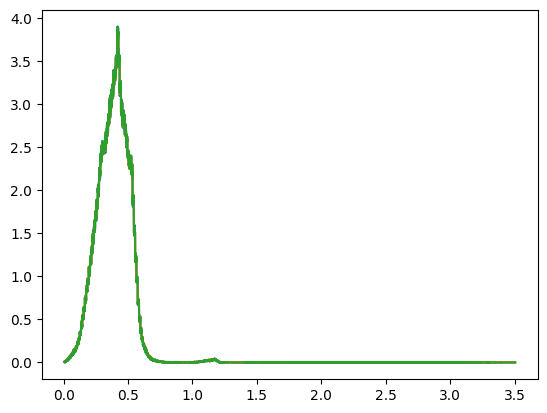

In [15]:
# First compare mine and Sara's without mbias:

plt.figure()
plt.plot(z_A_Sara, dNdz_A_Sara/norm_Sara_A, label='Sara, A')
plt.plot(z_A_me, dNdz_A_me/norm_me_A, label='me, A')
plt.plot(z_A_mb_me, dNdz_A_mb_me/norm_me_mb_A, label='me with mbias')
plt.show()

In [16]:
z_A_Sara

array([0.00540123, 0.00575112, 0.00610101, ..., 3.50327743, 3.50362733,
       3.50397722])

In [17]:
z_A_me

array([0.0052263 , 0.00557623, 0.00592616, ..., 3.50345229, 3.50380222,
       3.50415215])

In [25]:
#Interpolate Sara with me to compare:

me_A_normed_interp = interp1d(z_A_me, dNdz_A_me/norm_me_A)
dNdz_me_A_zSara = me_A_normed_interp(z_A_Sara)

me_A_normed_mb_interp = interp1d(z_A_mb_me, dNdz_A_mb_me/norm_me_mb_A)
dNdz_me_mb_A_zSara = me_A_normed_mb_interp(z_A_Sara)

/tmp/ipykernel_741733/698482767.py:2: RuntimeWarning: divide by zero encountered in divide
  plt.plot(z_A_Sara, dNdz_me_A_zSara/(dNdz_A_Sara/norm_Sara_A))
/tmp/ipykernel_741733/698482767.py:2: RuntimeWarning: invalid value encountered in divide
  plt.plot(z_A_Sara, dNdz_me_A_zSara/(dNdz_A_Sara/norm_Sara_A))


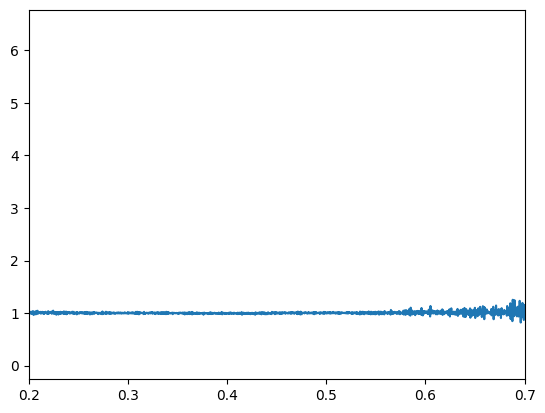

In [24]:
plt.figure()
plt.plot(z_A_Sara, dNdz_me_A_zSara/(dNdz_A_Sara/norm_Sara_A))
plt.xlim(0.2,0.7)
plt.show()

/tmp/ipykernel_741733/2531723140.py:2: RuntimeWarning: divide by zero encountered in divide
  plt.plot(z_A_Sara, dNdz_me_mb_A_zSara/(dNdz_A_Sara/norm_Sara_A))
/tmp/ipykernel_741733/2531723140.py:2: RuntimeWarning: invalid value encountered in divide
  plt.plot(z_A_Sara, dNdz_me_mb_A_zSara/(dNdz_A_Sara/norm_Sara_A))


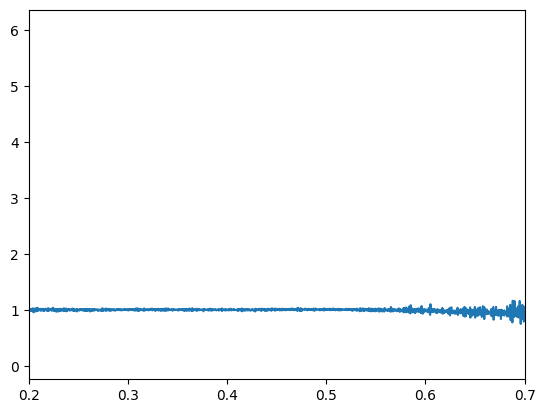

In [26]:
plt.figure()
plt.plot(z_A_Sara, dNdz_me_mb_A_zSara/(dNdz_A_Sara/norm_Sara_A))
plt.xlim(0.2,0.7)
plt.show()

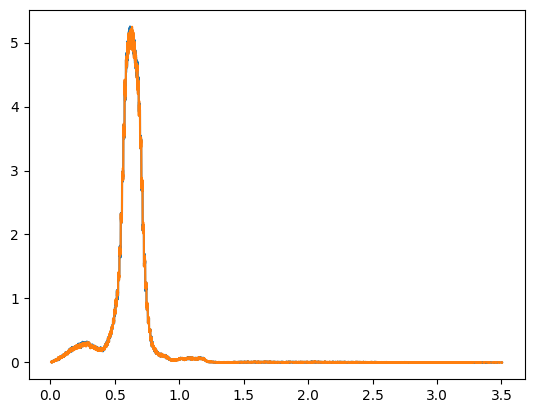

In [14]:

plt.figure()
plt.plot(z_B_Sara, dNdz_B_Sara/norm_Sara_B, label='Sara, A')
plt.plot(z_B_me, dNdz_B_me/norm_me_B, label='me, A')
plt.show()

In [27]:
mean_z = simps(z_A_Sara*(dNdz_A_Sara/norm_Sara_A), z_A_Sara)

In [28]:
print(mean_z)

0.39285739346967563


In [29]:
mean_z_mb = simps(z_A_mb_me*dNdz_A_mb_me/norm_me_mb_A, z_A_mb_me)

In [30]:
print(mean_z_mb)

0.3924872015304319


In [ ]:
# Difference in the mean of 0.0004

In [31]:
mean_z_B = simps(z_B_Sara*(dNdz_B_Sara/norm_Sara_B), z_B_Sara)

In [32]:
mean_z_mb_B = simps(z_B_mb_me*dNdz_B_mb_me/norm_me_mb_B, z_B_mb_me)

In [33]:
mean_z_B

0.6239333466621326

In [34]:
mean_z_mb_B

0.623890195572523

In [ ]:
# Difference in the mena of 0.0001

# So it probably isn't going to solve the issue. 